In [51]:
# 导入必要的库
import os
import random
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from ultralytics import YOLO
import supervision as sv
import warnings
warnings.filterwarnings('ignore')

### 6.3.1蜜蜂标注数据准备

**随机查看训练集的图片及其标注信息**

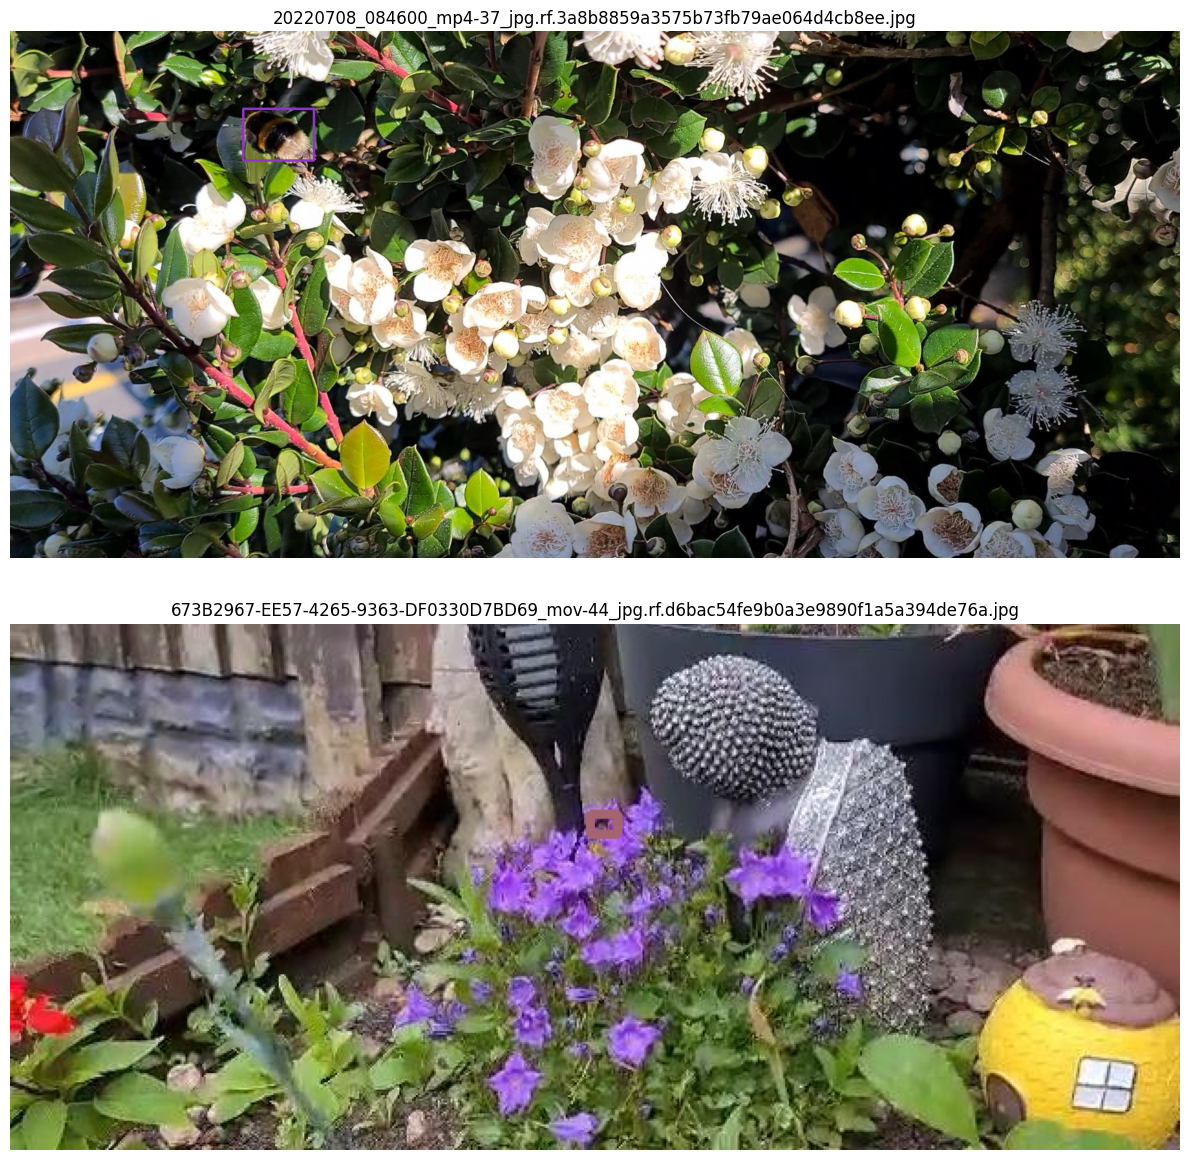

In [2]:
def load_image(image_path):
    """
    加载图像并将其从BGR格式转换为RGB格式。
    
    参数:
    image_path (str): 图像文件的路径
    
    返回:
    numpy.ndarray: RGB格式的图像数组
    """
    image = cv2.imread(image_path)  # 使用OpenCV读取图像
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 将图像从BGR格式转换为RGB格式

def draw_bounding_boxes(image, label_path):
    """
    在图像上绘制边界框。
    
    参数:
    image (numpy.ndarray): 输入的图像数组
    label_path (str): 对应的标签文件路径
    """
    with open(label_path, 'r') as file:
        lines = file.readlines()  # 读取标签文件的所有行
    
    for line in lines:
        parts = line.strip().split()  # 去除行末换行符并按空格分割
        class_id = int(parts[0])  # 第一个值是类别ID
        x_center, y_center, width, height = map(float, parts[1:5])  # 后四个值分别是中心点坐标和宽高
        
        h, w, _ = image.shape  # 获取图像的高度和宽度
        x_min = int((x_center - width / 2) * w)  # 计算边界框左上角的x坐标
        y_min = int((y_center - height / 2) * h)  # 计算边界框左上角的y坐标
        x_max = int((x_center + width / 2) * w)  # 计算边界框右下角的x坐标
        y_max = int((y_center + height / 2) * h)  # 计算边界框右下角的y坐标
        
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) # 颜色随机
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)  # 绘制边界框，宽度为3

# 图像目录路径
images_dir = 'datasets/train/images'
# 标签目录路径
labels_dir = 'datasets/train/labels'

# 获取所有.jpg文件名
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
# 随机选择两张图片
selected_images = random.sample(image_files, 2)

# 创建两个子图，用于显示两张图片
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(images_dir, img_file)  # 构建图像文件的完整路径
    label_file = img_file.replace('.jpg', '.txt')  # 替换文件扩展名为.txt以获取对应的标签文件
    label_path = os.path.join(labels_dir, label_file)  # 构建标签文件的完整路径
    
    image = load_image(img_path)  # 加载图像
    draw_bounding_boxes(image, label_path)  # 在图像上绘制边界框
    
    ax.imshow(image)  # 显示图像
    ax.axis('off')  # 关闭坐标轴
    ax.set_title(img_file)  # 设置子图标题为图像文件名

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()  # 显示最终结果

### 6.3.2YOLO11模型训练

In [4]:
# 初始化一个YOLO11模型
model = YOLO('yolo11n.pt')  # 使用预训练yolo11n.pt模型
# 训练模型
results = model.train(
    data='data.yaml',  # 数据集配置文件路径
    epochs=10,                # 训练轮数
    imgsz=640,                # 输入图像大小
    batch=16,                 # 批处理大小
    device='cpu',             # 设备选择，可以是'cpu'或'cuda'
    save=True,                # 保存训练结果
    plots=True                 # 保存训练和验证指标图以及预测示例
)

New https://pypi.org/project/ultralytics/8.3.55 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.51  Python-3.10.16 torch-2.4.1+cpu CPU (Intel Core(TM) i7-4720HQ 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

train: Scanning F:\YOLO11\chapter06\bee_detection\datasets\train\labels.cache... 150 images, 9 backgrounds, 0 corrupt: 
val: Scanning F:\YOLO11\chapter06\bee_detection\datasets\valid\labels.cache... 30 images, 6 backgrounds, 0 corrupt: 100


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       2.97      8.625      1.858          7        640: 100%|██████████| 10/10 [01:19<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<0

                   all         30         25      0.001       0.36    0.00074   0.000215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.651      7.336      1.546          5        640: 100%|██████████| 10/10 [01:19<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00178       0.64    0.00184   0.000395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.448      6.413      1.483          6        640: 100%|██████████| 10/10 [01:14<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25      0.002       0.72      0.063     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.454      5.396      1.486          6        640: 100%|██████████| 10/10 [01:12<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00167        0.6     0.0866      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.297       4.79       1.42          5        640: 100%|██████████| 10/10 [01:07<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00189       0.68     0.0413     0.0083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.342      4.469      1.449          7        640: 100%|██████████| 10/10 [01:04<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00222        0.8     0.0369    0.00888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.341      4.332      1.433          5        640: 100%|██████████| 10/10 [01:06<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00244       0.88     0.0778     0.0232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G        2.2      3.954      1.434          6        640: 100%|██████████| 10/10 [01:06<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25    0.00256       0.92      0.323      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.104      3.739       1.42          5        640: 100%|██████████| 10/10 [01:07<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25      0.449       0.68      0.454      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.197      3.613      1.448          6        640: 100%|██████████| 10/10 [01:10<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0

                   all         30         25      0.893      0.333      0.615      0.223



10 epochs completed in 0.212 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 5.4MB
Optimizer stripped from runs\detect\train\weights\best.pt, 5.4MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.51  Python-3.10.16 torch-2.4.1+cpu CPU (Intel Core(TM) i7-4720HQ 2.60GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<0


                   all         30         25      0.893      0.333      0.613      0.222
Speed: 1.4ms preprocess, 76.5ms inference, 0.0ms loss, 12.2ms postprocess per image
Results saved to runs\detect\train


In [6]:
# 查看train2文件夹下的内容
os.listdir('runs/detect/train2')

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'events.out.tfevents.1728200469.aa9c6245da0e.573.0',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'train_batch7060.jpg',
 'train_batch7061.jpg',
 'train_batch7062.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'weights']

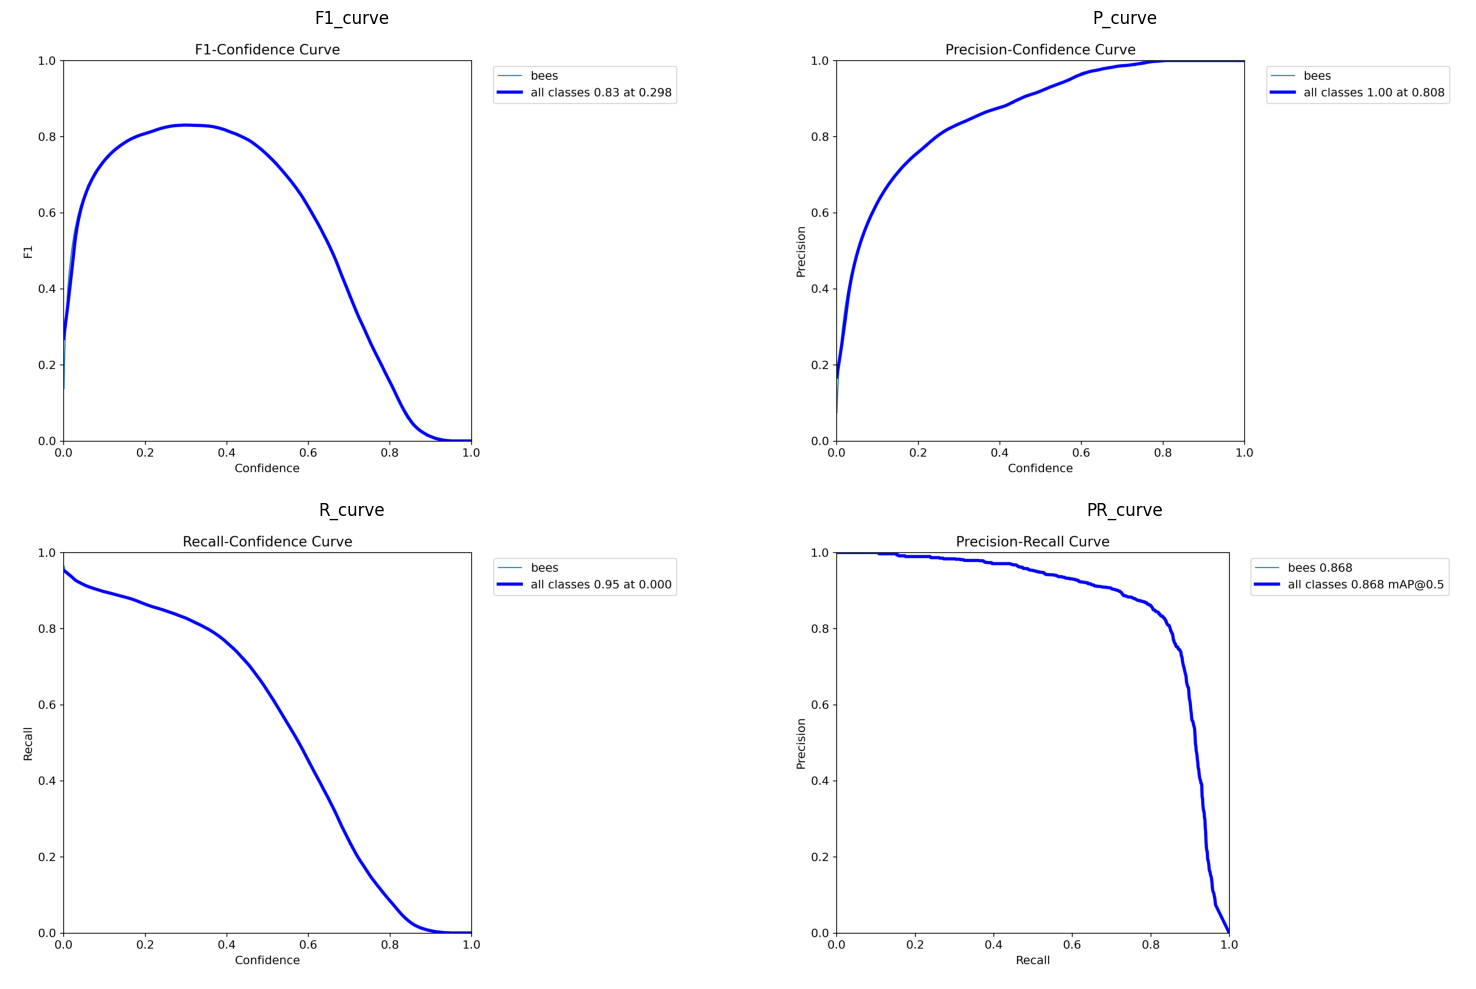

In [9]:
# 展示性能评价曲线

# 指定图片所在的目录
directory = 'runs/detect/train2'

# 定义要展示的图片文件名
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png'
]

# 创建一个包含4个子图的图形
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # 将二维数组展平为一维数组以便于索引

# 遍历每个图片文件并加载到相应的子图中
for ax, image_file in zip(axes, image_files):
    image_path = os.path.join(directory, image_file)
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        ax.imshow(img)
        ax.set_title(os.path.splitext(image_file)[0])  # 设置子图标题为图片文件名（去掉扩展名）
        ax.axis('off')  # 关闭坐标轴
    else:
        ax.text(0.5, 0.5, f"File not found: {image_file}", ha='center', va='center', fontsize=12)
        ax.axis('off')

# 调整子图间距
plt.tight_layout()
plt.show()

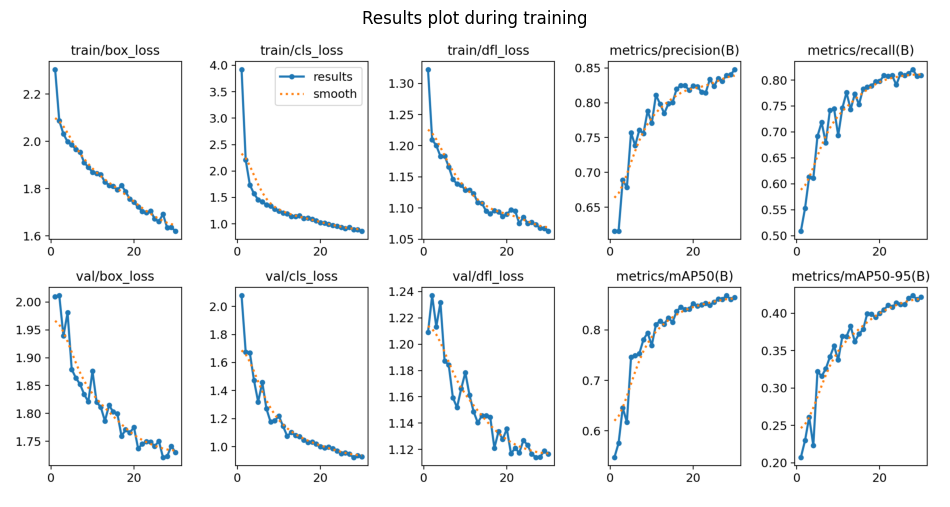

In [13]:
# 展示results.png图片

# 图片路径
image_path = 'runs/detect/train2/results.png'
# 读取图片
img = plt.imread(image_path)
# 创建一个图形窗口并显示图片
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.title('Results plot during training')  
plt.axis('off') 
plt.show()

In [20]:
# 导入并查看results.csv后六行
results = pd.read_csv('runs/detect/train2/results.csv')
results.tail()

epoch  train/box_loss  train/cls_loss  train/dfl_loss  \
25     26          1.6609         0.91100          1.0770   
26     27          1.6922         0.93132          1.0733   
27     28          1.6348         0.89288          1.0681   
28     29          1.6369         0.89219          1.0672   
29     30          1.6199         0.85981          1.0628   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
25               0.83490            0.80909           0.86068   
26               0.83118            0.81300           0.86036   
27               0.83950            0.82051           0.86788   
28               0.84021            0.80718           0.86047   
29               0.84793            0.80872           0.86376   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
25              0.41147        1.7504       0.95614        1.1166  0.000125   
26              0.41985        1.7212       0.94722        1.1140  0.000101   
27              0.42357        1.7231       0.92392        1.1141  0.000078   
28              0.41832        1.7414       0.93589        1.1189  0.000054   
29              0.42141        1.7302       0.92932        1.1166  0.000031   

      lr/pg1    lr/pg2  
25  0.000125  0.000125  
26  0.000101  0.000101  
27  0.000078  0.000078  
28  0.000054  0.000054  
29  0.000031  0.000031

### 6.3.3模型验证

In [24]:
# 加载训练好的最优模型
model = YOLO('runs/detect/train2/weights/best.pt')
# 模型验证
metrics = model.val(data='data.yaml')

Ultralytics 8.3.51  Python-3.10.16 torch-2.4.1+cpu CPU (Intel Core(TM) i7-4720HQ 2.60GHz)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning F:\YOLO11\chapter06\bee_detection\datasets\valid\labels.cache... 30 images, 6 backgrounds, 0 corrupt: 100
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<0


                   all         30         25      0.892       0.84      0.944      0.357
Speed: 1.2ms preprocess, 50.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val


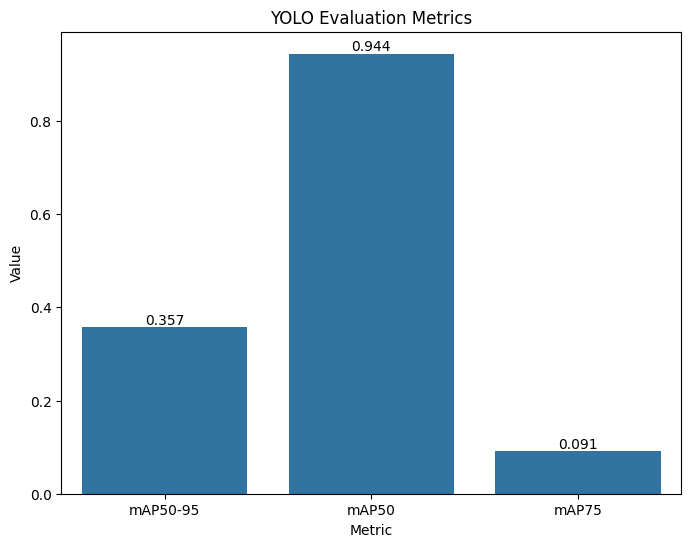

In [28]:
%matplotlib inline
# 创建柱状图
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], 
                           y=[metrics.box.map, metrics.box.map50, metrics.box.map75])
# 设置标题和轴标签
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
fig = plt.gcf()
fig.set_size_inches(8, 6)
# 在柱形图上方添加数值
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
# 显示图形
plt.show()

### 6.3.4 模型预测

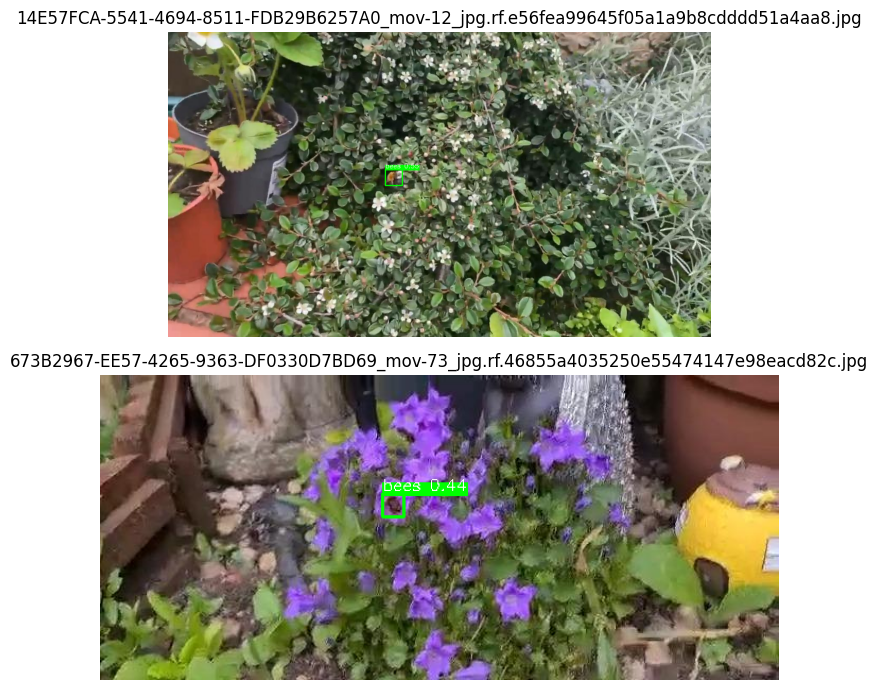

In [36]:
# 指定测试图片目录
test_images_dir = 'datasets/test/images'

# 获取所有.jpg文件名
image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg')]

# 随机选择两张图片
selected_images = random.sample(image_files, 2)

# 加载best.pt模型
model = YOLO('runs/detect/train2/weights/best.pt')

def load_image(image_path):
    """
    加载图像并将其从BGR格式转换为RGB格式。
    
    参数:
    image_path (str): 图像文件的路径
    
    返回:
    numpy.ndarray: RGB格式的图像数组
    """
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def draw_bounding_boxes(image, results):
    """
    在图像上绘制边界框、类别标签和置信度。
    
    参数:
    image (numpy.ndarray): 输入的图像数组
    results (list): 检测结果列表
    """
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            r = box.xyxy[0].astype(int)  # 边界框坐标
            cls = int(box.cls[0])  # 类别ID
            conf = round(float(box.conf[0]), 2)  # 置信度
            
            color = (0, 255, 0)  # 固定颜色为绿色
            cv2.rectangle(image, (r[0], r[1]), (r[2], r[3]), color, 2)  # 绘制边界框，宽度为2
            
            # 添加类别标签和置信度
            label = f'{result.names[cls]} {conf}'
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            thickness = 1
            text_size = cv2.getTextSize(label, font, font_scale, thickness)[0]
            
            text_x = max(r[0], 0)
            text_y = max(r[1] - 10, 0)
            text_w, text_h = text_size
            
            cv2.rectangle(image, (text_x, text_y), 
                          (text_x + text_w, text_y + text_h), 
                          color, -1)
            cv2.putText(image, label, 
                        (text_x, text_y + text_h - 5), 
                        font, font_scale, 
                        (255, 255, 255), 
                        thickness)

# 创建一个包含两个子图的图形窗口
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(test_images_dir, img_file)
    
    # 加载图像
    image = load_image(img_path)
    
    # 进行目标检测
    results = model.predict(source=img_path, save=False, verbose=False)
    
    # 绘制边界框和标签
    draw_bounding_boxes(image, results)
    
    # 显示图像
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(img_file)

plt.tight_layout()
plt.show()